First step to be followed is to import the necessary packages. 

In [28]:
# Import packages
import pandas as pd
import numpy as np
import os

import scipy.stats as st
import statistics as stat
import matplotlib.pyplot as plt

Then I need to get my current working directory and set it if it is not what I want or expect. 

In [3]:
# Get Current Working Directory
os.getcwd()

'c:\\Users\\bfran\\Ironhack\\technical_challenge_DA'

Since my working directory was where I expected, there was no need to set it. 

Next step is to import my data. 

In [4]:
# Import data
data1 = pd.read_csv('c:\\Users\\bfran\\Ironhack\\technical_challenge_DA\\data\\measurements.csv')
data2 = pd.read_excel('c:\\Users\\bfran\\Ironhack\\technical_challenge_DA\\data\\measurements2.xlsx')

However, since there are two different datasets, I need to compare them. I start by checking the length of each, and then by checking the column names. 

In [5]:
# Compare datasets to check if they are the same
print('Difference in # of rows:',len(data1) - len(data2))
print(data1.columns)
print(data2.columns)

Difference in # of rows: 0
Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')
Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')


I'm suspecting that they are the same since they are the same length and have all the same column names. However, I need to dig a little deeper just to be sure. **.describe()** will show me the basic statistical measures of all the numerical columns of both datasets.

In [6]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [7]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


The data2 dataset seems to have more numerical variables than data1, but the overlap is exactly the same. I need to check column types. 

In [8]:
data1.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [9]:
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

So all the float columns in data2 are object columns in data1. If I convert those numeric columns to floats, and the descriptive statistics come out the same, I'll be satisfied that they are the same data and I can just use one instead of the other. 

In [10]:
# create a list of columns that should be floats
float_cols = ['distance','consume', 'temp_inside','refill liters']

# cast those columns as floats in data1
data1[float_cols] = data1[float_cols].astype(float)

# Check descriptive statistics of data1 again. 
data1.describe().T

ValueError: could not convert string to float: '11,2'

When I run the above I get an error that tells me, essentially, that the originator of this data seems to have used the European style decimal system rather than the American, meaning that instead of writing, for example, 11.2 liters of gas, the author of the data likely recorded it as 11,2 liters of gas. So I need to run all that again, this time replacing the ','s with '.'s. 

In [11]:
# create a list of columns that should be floats
float_cols = ['distance','consume', 'temp_inside','refill liters']

# replace commas with periods in those columns
data1[float_cols] = data1[float_cols].astype(str).replace(",",".",regex=True)

# Strip any leading or trailing spaces
data1[float_cols] = data1[float_cols].apply(lambda x: x.str.strip())

# cast those columns as floats in data1
data1[float_cols] = data1[float_cols].astype(float)

# Check descriptive statistics of data1 again. 
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


In [12]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


Having done all that cleaning, I can confirm that the two datasets are exactly the same. Meaning that I can just stick with one. I'll stick with the one that I've cleaned, data1. 

Next, I need to do some more cleaning, handling missings and duplicates. 

In [13]:
# Check how many nulls there are in each column
data1.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [14]:
len(data1)

388

So out of 388 total rows, temp_inside is missing data in 12 rows, specials is missing data in 295, and both refill gas and refill liters are missing data in 375 rows. That's a lot of missings for the former 3 columns. 

In [15]:
# Find out what 'special' information is in the specials column. 
data1['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

As per the authors notes on Kaggle, the specials column just contains information about road/weather conditions when it was noteworthy, according to the author. Obviously those days are going to have an impact on the kilometers per gallon and speed and such. I'll check for outliers later, and if the rows that are marked with inclement weather (rain or snow) aren't outliers, then I'll probably just delete the column. 

It seems that there are so many missings in the data because author of the data was not refilling his gas tank every day, but rather was only refilling as needed. But, since the author already included a column with information about what type of gas was in the tank each time he logged activity, this column can be deleted. 

In [16]:
# Starting with deleting 'refill gas'. 
data1.drop(columns='refill gas', inplace=True)

After careful consideration, I think it will be best to also delete the refill liters column, since it doesn't really give us any important information to work with. 

In [17]:
# delete the 'refill liters' column
data1.drop(columns='refill liters', inplace=True)

Looking at the data, it looks like the author already one-hot encoded AC, rain, and sun from the 'specials' column. So if I just create another column, 'snow', that one-hot encodes instances where there was snow on the road (few though they were), I can delete the 'specials' column. 

In [18]:
# Create column 'snow' that checks for the presence of the word 'snow'
data1['snow'] = data1['specials'].str.contains('snow', case=False, na=False).astype(int)

In [19]:
# Delete specials column
data1.drop(columns='specials', inplace=True)

Finally, since the range of temperatures is only about 6 degrees Celsius, and since the mean and median values of that column are basically the same, and since there are only 12 missings in the column, I don't think it would be a problem at all to fill those null values with the mean of the column.

In [20]:
# fill missings in temp_inside column with average of that column
data1['temp_inside'].fillna(data1['temp_inside'].mean(),inplace=True)

In [21]:
data1.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
snow            0
dtype: int64

Having handled the null values, now I can check for duplicates. 

In [22]:
# Check for duplicates
data1.duplicated().sum()

0

There are no duplicated rows, so the data is cleaned and ready to use!

The purpose of this project is to determine which type of gas (Super Plus 98 or Super Plus 95 E10) gets better gas mileage. 

I hypothesize that the Super Plus 98 will get better mileage since, though it is more expensive, it's not being diluted with Ethanol, which is cheaper and more environment friendly. 

H0: There is no difference in the gas consumption rate when using either type of gas.

HA: There is a difference in the amount of gas consumed when using one type of gas or the other. 

The first thing I need to do is subset the two datasets by which type of gas they used, then get the descriptive statistics for each to determine: 1) whether or not the average consumption even appears to be similar between the two, and 2) whether the other variables seem to have similar averages. 

In [23]:
# Get the names of the two specific gas types
data1['gas_type'].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [24]:
# Create subsets
sp98 = data1[data1['gas_type']=='SP98']
e10 = data1[data1['gas_type']=='E10']

In [25]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,388.0,21.929521,0.994666,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
snow,388.0,0.010309,0.101140,0.0,0.00,0.0,0.0,1.0


In [26]:
sp98.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,228.0,18.639912,24.179598,1.3,11.8,14.15,18.150,216.1
consume,228.0,4.899123,1.118408,3.3,4.2,4.70,5.225,12.2
speed,228.0,40.820175,13.170122,16.0,32.0,39.50,48.000,90.0
temp_inside,228.0,21.938007,1.177840,19.0,21.5,22.00,22.000,25.5
temp_outside,228.0,12.228070,7.271373,-3.0,7.0,11.00,17.000,31.0
AC,228.0,0.100877,0.301829,0.0,0.0,0.00,0.000,1.0
rain,228.0,0.140351,0.348115,0.0,0.0,0.00,0.000,1.0
sun,228.0,0.087719,0.283509,0.0,0.0,0.00,0.000,1.0
snow,228.0,0.013158,0.114201,0.0,0.0,0.00,0.000,1.0


In [27]:
e10.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,160.0,21.096250,20.307234,1.7,12.075,15.4,21.20,130.3
consume,160.0,4.931250,0.900956,3.7,4.400,4.8,5.30,10.8
speed,160.0,43.506250,14.077949,14.0,35.000,42.0,51.00,88.0
temp_inside,160.0,21.917429,0.653602,21.0,21.500,21.5,22.50,25.0
temp_outside,160.0,10.118750,6.392185,-5.0,6.000,9.0,14.25,27.0
AC,160.0,0.043750,0.205181,0.0,0.000,0.0,0.00,1.0
rain,160.0,0.100000,0.300942,0.0,0.000,0.0,0.00,1.0
sun,160.0,0.075000,0.264218,0.0,0.000,0.0,0.00,1.0
snow,160.0,0.006250,0.079057,0.0,0.000,0.0,0.00,1.0


Right off the bat, it looks like the consumption rate in all three datasets (the original, the SP98 subset, and the E10 subset) are all fairly close to eachother. In the original dataset, which contains general information about gas consumption (in liters/100km) regardless of the type of gas, consumption is 4.91 liters of gas for every 100km. In the SP98 subset, consumption is 4.89 liters for every 100km, and in the E10 subset gas consumption is 4.93 liters per 100km. This suggests that, on average, a whopping 0.04 extra liters of E10 gas are consumed every 100km over the SP98. Meaning that, based on initial observations, SP98 is only slightly more fuel efficient. 

Having a smaller standard deviation, though, the consumption rate in the E10 subset was *more consistent*, suggesting that hot or cold, rain or shine, fast or slow, the E10 was used more consistently. This would contribute to more consistent fill-up rates, and therefore more consistent gasoline costs. 

There are other differences to consider between the datasets, though. 

First off, based on averages, it seems like the E10 gas was used to drive consistently farther distances, with the average and third quartile distances in the E10 subset being about 2.5km and 3km higher, respectively. That's only about a 1.5- to 2-mile difference, but it's a difference. 

Secondly, the average outside temperature is just a little bit lower in the E10 dataset, as reflected by both the mean, min, median, and max outside temperatures in both datasets as well as the lower rate of AC usage. This means that despite the engine doing less cooling (and therefore less work) while using the E10 gas, the engine still consumed slightly more of it. This is just another indication that the SP98 gas is better for the engine. 

Before we can commit to these conclusions, though, we need to test whether or not there's actually any statistically significant difference in the gas consumption rate between the two gas type subsets.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


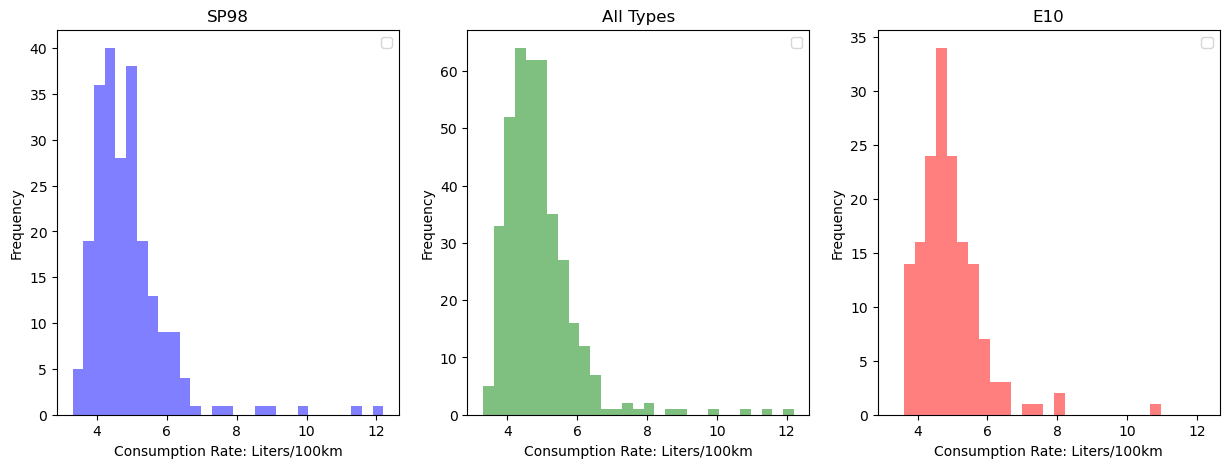

In [41]:
# Create subplots for histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Determine the range for the bins
bins = np.linspace(min(min(sp98['consume']), min(data1['consume']), min(e10['consume'])), 
                   max(max(sp98['consume']), max(data1['consume']), max(e10['consume'])), 30)

# Plot histograms
axes[0].hist(sp98['consume'], bins=bins, alpha=0.5, color='b')
axes[1].hist(data1['consume'], bins=bins, alpha=0.5, color='g')
axes[2].hist(e10['consume'], bins=bins, alpha=0.5, color='r')

# Add titles and labels
axes[0].set_title('SP98')
axes[1].set_title('All Types')
axes[2].set_title('E10')
for ax in axes:
    ax.set_xlabel('Consumption Rate: Liters/100km')
    ax.set_ylabel('Frequency')
    ax.legend()


Looking at a histogram plot of the three datasets, it seems like the consumption rates are all somewhat normally distributed, so that's good. This also just visually represents the observations I made earlier, mostly highlighting that the differences in the distribution of gas consumption rates between the SP98 (purple) and E10 (red) are slight. Both average out at about 5l/100km, both have isolated outlying instances of consumption above 10l/100km (though SP98 reached higher levels of consumption slightly more frequently). Both also seem to have the majority of their observations falling between 4l and 6l/100km. Neither look terribly different from each other or from the general consumption represented by the green chart. 

Looking at these charts mostly tells us that we are probably good to test our hypothesis since both datasets are distributed fairly normally. 

In [49]:
# create data subsets to test just what we need
sp98_consume = sp98['consume']
e10_consume = e10['consume']

# Run a two-sample t-test to determine if there is a statistically significant difference between the two consumption rates
st.ttest_ind(sp98_consume, e10_consume, equal_var=True)

TtestResult(statistic=-0.3011626300254617, pvalue=0.7634526478628367, df=386.0)

The p-value in this case is 0.76. This means that we fail to reject our null hypothesis, and must conclude that there is actually no difference in consumption rates between the two types of gas. There's more to explore with this, though. 

If the consumption rates are the same but there's a difference between, say, the distance driven or the temperature outside, it may mean that one is still actually more effective than the other. 

In [50]:
sp98_distance = sp98['distance']
e10_distance = e10['distance']

st.ttest_ind(sp98_distance, e10_distance, equal_var=True)

TtestResult(statistic=-1.0508677954693455, pvalue=0.2939767625788915, df=386.0)

This t-test shows that there is also no statistically significant difference between the distance driven using either type of gas, so we get no indications of whether one is better than the other from this, either. 

In [51]:
sp98_temp = sp98['temp_outside']
e10_temp = e10['temp_outside']

st.ttest_ind(sp98_temp, e10_temp, equal_var=True)

TtestResult(statistic=2.9544384402695343, pvalue=0.003324325563697031, df=386.0)

With a p-value this low, we have to conclude that there was definitely a significant difference between outside temperatures - meaning that one type of gas was used while it was warmer outside, the other while it was colder. I don't personally know if temperature affects how gas burns or performs, but if further research were to indicate that it does, then that could give indications about whether or not one type of gas does actually perform better than the other. 

However, one thing that I do know affects engine performance (and therefore gasoline consumption) is Air Conditioner usage. Specifically, if the Air Conditioner is being used, fuel efficiency tends to go down, and fuel consumption per mile (or per 100km in this case) tends to go up. So, if the AC was used more freqently while the author of this data set was using one fuel or the other, that could also give indications that one fuel type is more efficient than the other. 

In [52]:
sp98_ac = sp98['AC']
e10_ac = e10['AC']

st.ttest_ind(sp98_ac, e10_ac, equal_var=True)

TtestResult(statistic=2.0800909895191864, pvalue=0.03817644257696843, df=386.0)

The p-value is below 0.05, indicating that there was indeed a significant difference in the rate of AC usage. Specifically, the author of the data definitely used the AC more frequently while using the SP98 gas. Since the SP98 gas performed equally as well as the E10 gas while also adding the additional consumption effect of AC usage, this suggests one of two things that require further research. 

The first indication this gives is that SP98 does consume at a rate that allows for higher engine demands.

However, it could also imply that AC usage doesn't affect fuel consumption. 

This will require further research on the part of Cobify to reach a more solid conclusion.


### Final Conclusions

I would recommend that if Cobify intends to operate in an area or at a time of year that will generally require more AC usage, that SP98 may be the better way to go, simply because this data proves that it can perform equally as well as E10 even if the AC is running more consistently. This recommendation comes with a grain of salt, though, because the E10 gas wasn't used when outside temperatures merited AC use, so we don't know if its performance would be affected by more frequent AC usage. 

However, if Cobify isn't worried about whether or not their drivers will be cranking their AC, and if they truly do want to be 'more green', I highly recommend that they make a permanent switch to E10 since the data clearly indicates that there's no difference in fuel consumption between the two types of fuel. 